# Widzenie komputerowe
# Moduł laboratoryjny 3, Laboratoria 5 i 6

## Opis laboratoriów



*   Wprowadzenie do operacji morfologicznych,
*   Operacje morfologiczne dla obrazów binarnych,
*   Operacje morfologiczne dla obrazów ze skalą intensywności,
*   Morfologia jako narzędzie do segmentacji



## Funkcje pomocnicze

Do wykonania zadań niezbędne jest zaimportowanie bibliotek, wykorzystywanych w skrypcie oraz pobranie danych, na których przetwarzane będą operacje.

W skrypcie wykorzystywane będą dwa zestawy danych:
* obraz Lenna (dostępny pod [linkiem](http://www.lenna.org/)) - jeden z najbardziej popularnych obrazów wykorzystywanych historycznie do kompresji i przetwarzania obrazów,
* Zdjęcie supernowy - zdjęcie kosmicznej eksplozji (dostępny pod [linkiem](https://upload.wikimedia.org/wikipedia/commons/b/bd/G299-Remnants-SuperNova-Type1a-20150218.jpg))

In [30]:
# import niezbędnych bibliotek
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
%matplotlib inline
from pandas import DataFrame
import pandas as pd
from IPython.display import display, HTML
from skimage.exposure import rescale_intensity
import plotly.graph_objects as go
import pandas as pd
import json
import os

pd.options.display.html.border = 0
pd.options.display.float_format = '{:,.2f}'.format

In [31]:
# pobranie niezbędnych bibliotek
!wget -O lena_std.tif http://www.lenna.org/lena_std.tif
!wget -O supernova.jpg https://upload.wikimedia.org/wikipedia/commons/b/bd/G299-Remnants-SuperNova-Type1a-20150218.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


Ze względu na problem z wyświetlaniem obrazów przez bibliotekę OpenCV w środowisku Colab, w przypadku korzystania z tej platformy należy skorzystać z funkcji specjalnie do tego przygotowanej.

In [32]:
def imshow(a):
  a = a.clip(0, 255).astype('uint8')
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

In [33]:
def h_color(a, interpolation=None, size=None, fy=1.5, fx=1.5, cmap='gray'):
  s = [int(a.shape[0] * fy), int(a.shape[1] * fx)] if size is None else size
  plt.figure(figsize=s)
  plt.tick_params(
    axis='both', which='both',
    bottom=False, top=False,
    labelbottom=False, labelleft=False, left=False, right=False
  )
  plt.imshow(a, cmap=cmap, interpolation=interpolation)

In [34]:
css = """
<style type="text/css">
  table, td, table.dataframe, table.dataframe td {
    border: 1px solid black;    //border: double;
    border-collapse: collapse;
    border-style: solid;
    border-spacing: 0px;
    background-color: rgb(250,250,250);
    width: 24px;
    height: 24px;
    text-align: center;
    transform: scale(1.0);
    margin: 5px;
    }
</style>
"""

def h(s):
   return display(HTML(css + DataFrame(s).to_html(header=False, index=False)))

In [35]:
def h_color_3d(z):
  fig = go.Figure(data=[go.Surface(z=z)])
  fig.update_layout(autosize=False, width=500, height=500)
  fig.show()

# Operacje morfologiczne


Operacja morfologiczna to technika przetwarzania obrazu binarnego, która modyfikuje obraz wejściowy w arbitralny sposób (np. zapalając lub gasząc bit piksela) na podstawie **dopasowania** otoczenia danego piksela z **elementem strukturalnym**.

Powyższa definicja operacji morfologicznej wymusza wytłumaczenie pewnych terminów:
* element strukturalny - maska bitowa, określająca strukturę, którą szukamy na obrazie. Nawiązując do operacji konwolucji, jest to odpowiednik dopasowywanej funkcji do obrazu wejściowego (np. laplasjan, pochodna),
* dopasowanie - zgodność elementu strukturalnego z wybranym pikselem oraz jego sąsiedztwem, wymiarowo odpowiadającym elementowi strukturalnemu. Może być reprezentowana jako maska bitowa o rozmiarze elementu strukturalnego,
* operacja morfologiczna przypomina konwolucję - również pewna funkcja jest dopasowywana do obrazu wejściowego, jednak aby wykonać modyfikację danego piksela muszą zostać spełnione pewne warunki zgodności,

Różne warunki zgodności definiują następujące operacje:
* erozja - jeśli **wszystkie zapalone** składowe elementu strukturalnego i odpowiadające im składowe otoczenia danego piksela są takie same, piksel jest zapalany. W przeciwnym wypadku gaszony. Inaczej: dopasowanie zawiera same **1**.
* dylatacja - jeśli **dowolna zapalona** składowa elementu strukturalnego i odpowiadająca mu składowa otoczenia danego piksela są takie same, piksel jest zapalany. W przeciwnym wypadku gaszony. Inaczej: dopasowanie zawiera choć jedno **1**.
* otwarcie - dylatacja poprzedzona erozją, (dylatacja(erozja(obraz))
* zamknięcie - erozja poprzedzona dylatacją, (erozja(dylatacja(obraz))


## Obraz binarny

Zdefiniujmy przykładowy obraz binarny oraz prosty element strukturalny o rozmiarze (2,2) wypełniony zapalonymi bitami.

Element strukturalny:


1,1
1,1


Obraz wejściowy:


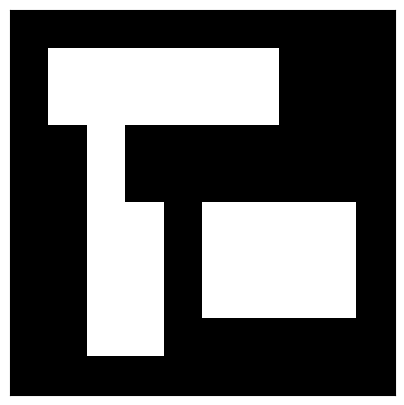

In [36]:
img_bin = np.zeros((10, 10), np.uint8)
img_bin[1:3, 1:7] = 1
img_bin[5:9, 2:4] = 1
img_bin[5:8, 5:9] = 1
img_bin[3:5, 2] = 1

struct = np.ones((2, 2),np.uint8)

print('Element strukturalny:')
h(struct)

print('Obraz wejściowy:')
h_color(img_bin, fx=0.5, fy=0.5)

### Erozja i Dylatacja

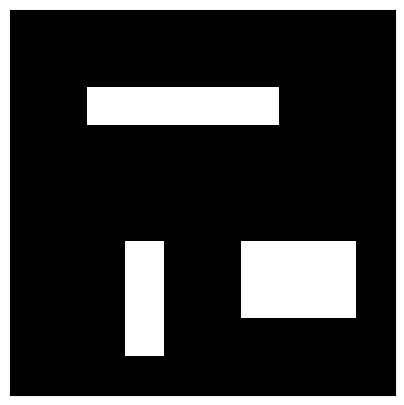

In [37]:
img_bin_ero = cv2.erode(img_bin, struct, iterations=1)
h_color(img_bin_ero, fx=0.5, fy=0.5)

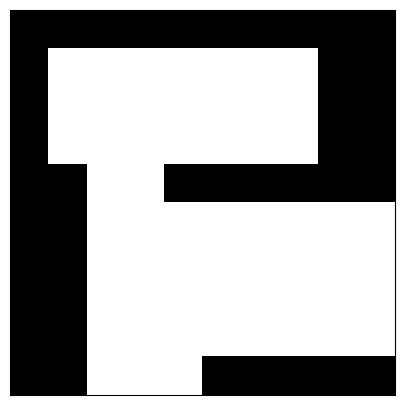

In [38]:
img_bin_dil = cv2.dilate(img_bin, struct, iterations=1)
h_color(img_bin_dil, fx=0.5, fy=0.5)

#### Zadanie 1

Zaimplementuj operację erozji i dylatacji:

Dopasowanie odpowiedającym sobie pikselom w elemencie strukturalnym i obrazie powinno odbywać się zgodnie z następującymi:
* dla składowej elementu strukturalnego 0, dopasowanie zachodzi zawsze,
* dla składowej elementu strukturalnego 1, dopasowanie zachodzi jeśli w obrazie wejściowym jest również 1,
* dla składowej elementu strukturalnego -1, dopasowanie zachodzi jeśli w obrazie wejściowym jest 0.

Tzn. dla elementu strukturalnego:

$$s = \begin{bmatrix}
0 & 1 & 0\\
1 & -1 & 1\\
-1 & 0 & -1\\
\end{bmatrix}$$

i obrazu:

$$I = \begin{bmatrix}
0 & 0 & 0\\
1 & 1 & 1\\
0 & 1 & 0\\
\end{bmatrix}$$

macierz dopasowania będzie wyglądała:

$$d = \begin{bmatrix}
1 & 0 & 1\\
1 & 0 & 1\\
1 & 1 & 1\\
\end{bmatrix}$$

a więc wynikiem dylatacji dla takiego zestawu danych będzie wartość 1 (ponieważ istnieje choć jedno dopasowanie), a dla erozji 0 (ponieważ nie wszystkie piksele są dopasowane).

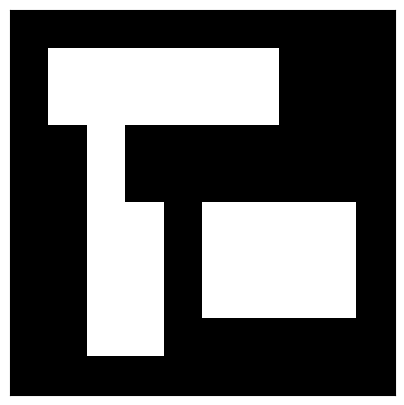

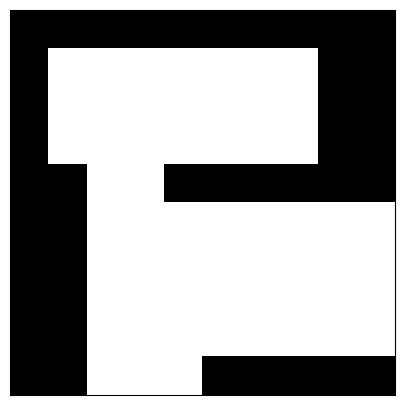

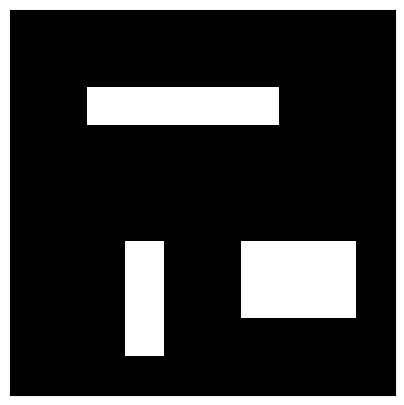

In [39]:
def morph(img, s):
    d = np.zeros_like(s)
    for i in range(s.shape[0]):
        for j in range(s.shape[1]):
            if s[i][j] == 0:
                d[i][j] = 1
            elif s[i][j] == 1 and img[i][j] == 1:
                d[i][j] = 1
            elif s[i][j] == -1 and img[i][j] == 0:
                d[i][j] = 1

    return d


def dilate(img, struct):
    pad_v = (struct.shape[0]) // 2
    pad_h = (struct.shape[1]) // 2
    img_o = np.zeros_like(img)
    img_b = cv2.copyMakeBorder(img, pad_v, pad_v, pad_h, pad_h, cv2.BORDER_CONSTANT, 0)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            d = morph(img_b[i:i+struct.shape[0],j:j+struct.shape[1]], struct)
            if np.count_nonzero(d) > 0:
                img_o[i][j] = 1

    return img_o

def erode(img, struct):
    pad_v = (struct.shape[0]) // 2
    pad_h = (struct.shape[1]) // 2
    img_o = np.zeros_like(img)
    img_b = cv2.copyMakeBorder(img, pad_v, pad_v, pad_h, pad_h, cv2.BORDER_CONSTANT, 0)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            d = morph(img_b[i:i+struct.shape[0],j:j+struct.shape[1]], struct)
            if np.count_nonzero(d) == struct.size:
                img_o[i][j] = 1

    return img_o

struct = np.ones((2, 2),np.uint8)

h_color(img_bin, fx=0.5, fy=0.5)
h_color(dilate(img_bin, struct), fx=0.5, fy=0.5)
h_color(erode(img_bin, struct), fx=0.5, fy=0.5)

### Otwarcie i Zamknięcie

Intuicją stojącą za operacją otwarcia jest próba rozłączenia od siebie obszarów, które są słabo ze sobą związane. Przez *słabo* można rozumieć szum lub zwyczajne artefakty powstałe podczas przetwarzania obrazów.

Zastosowanie operacji otwarcia można znaleźć w sytuacji, w której wykonujemy segmentację obiektów i w rezultacie otrzymamy dwa obiekty tej samej klasy obok siebie. Obiekty te mogą być połączone pojedynczymi pikselami. Aby oddzielić te obiekty od siebie (w celu tzw. **instance segmentation**) można skorzystać właśnie z **otwarcia** morfologicznego.

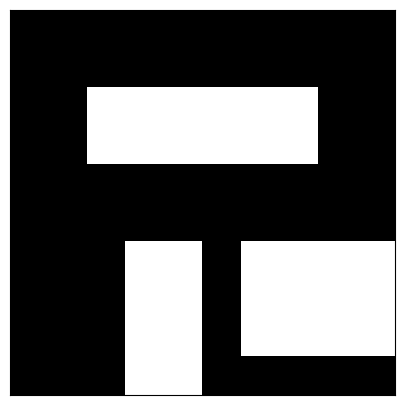

In [40]:
img_bin_ero = cv2.erode(img_bin, struct, iterations=1)
img_bin_ero_dil = cv2.dilate(img_bin_ero, struct, iterations=1)

h_color(img_bin_ero_dil, fx=0.5, fy=0.5)

Zamierzeniem zamknięcia jest połączenie obszarów znajdujących się blisko siebie ale ze względu na szum/artefakty rozłączne. W poniższym przykładnie oba obszary znajdują się blisko siebie, przez co możliwe, że reprezentują ten sam obiekt. Operacja zamknięcia spowoduje połączenie tych obszarów.

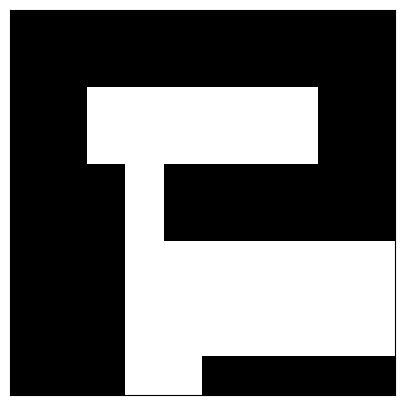

In [41]:
img_bin_dil = cv2.dilate(img_bin, struct, iterations = 1)
img_bin_dil_ero = cv2.erode(img_bin_dil, struct, iterations = 1)

h_color(img_bin_dil_ero, fx=0.5, fy=0.5)

#### Zadanie 2

Zaimplementuj, korzystając z wcześniej zaimplementowanych operacji erozji i dylatacji, operację otwarcia i zamknięcia zgodnie z poniższymi wzorami:

* $O(f) = {\text{dylatacja}}({\text{erozja}}(f))$ - otwarcie
* $C(f) = {\text{erozja}}({\text{dylatacja}}(f))$ - zamknięcie

**Uwaga: wewnętrzna erozja i dylatacja wykonana jest z tym samym elementem strukturalnym.**

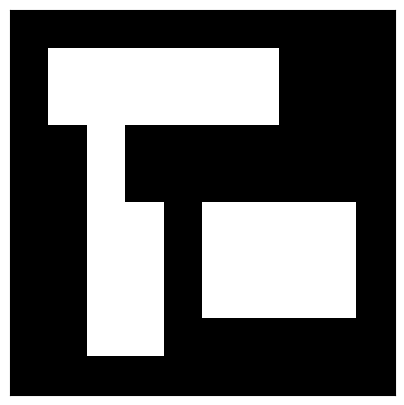

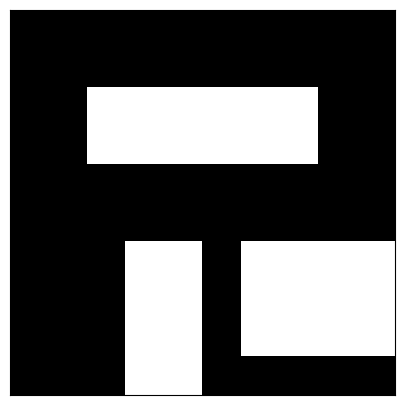

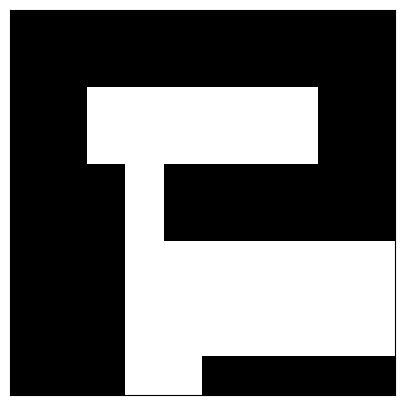

In [42]:
def open(img, struct):
    return dilate(erode(img, struct), struct)

def close(img, struct):
    return erode(dilate(img, struct), struct)

h_color(img_bin, fx=0.5, fy=0.5)
h_color(open(img_bin, struct), fx=0.5, fy=0.5)
h_color(close(img_bin, struct), fx=0.5, fy=0.5)

### Pozostałe operacje morfologiczne

Istnieje wiele operacji morfologicznych o konkretnych zastosowaniach w przetwarzaniu obrazu. Większość z nich opiera się na operacjach zamknięcia i otwarcia. Oznaczmy otwarcie i zamknięcie jako:

* $O(f) = {\text{dylatacja}}({\text{erozja}}(f))$ - otwarcie
* $C(f) = {\text{erozja}}({\text{dylatacja}}(f))$ - zamknięcie


### Otwarcie właściwe, zamknięcie właściwe i automediana

Dla przytoczonych wyżej definicji otwarcia i zamknięcia, możemy zdefiniować następujące operacje morfologiczne:

* $Q(f) = \min(f, C(O(C(f))))$ - otwarcie właściwe
* $G(f) = \max(f, O(C(O(f))))$ - zamknięcie właściwe
* $A(f) = \max(O(C(O(f))), \min(f, C(O(C(f)))))$ - automediana

Dla poniższego obrazu wykonana zostanie arbitralnie przyjęta binaryzacja, w celu dalszego przetwarzania operacjami morfologicznymi.

Supernowa przedstawiona na obrazie charakteryzuje się wieloma szczegółami w postaci innych galaktyk, które przypominają sztucznie dodany szum. Celem poniższego przetwarzania będzie wykrycie obszarów gdzie znajduje się supernowa, jednocześnie eliminując obszary gdzie znajdują sie obszary nie należące do obiektu.

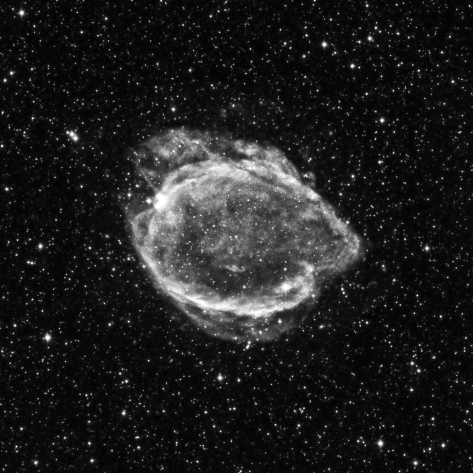

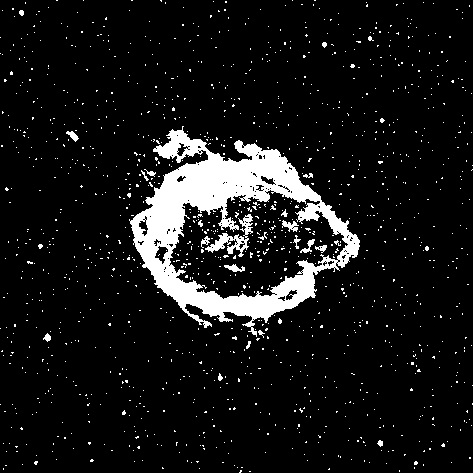

In [47]:
img_space_raw = cv2.imread('./supernova.jpg', 0)
img_space_raw = cv2.resize(img_space_raw, None, fx=0.5, fy=0.5)
img_space = (img_space_raw > 100).astype(np.uint8) * 255

struct = np.ones([5, 5], np.uint8)
imshow(img_space_raw)
imshow(img_space)

Przypomnijmy, operacja otwarcia właściwego słada się z 3 następujących po sobie operacji: zamknięcia, otwarcia i znowu zamknięcia. Wynik, jest porównywany z **obrazem wejściowym**, a rezultatem jest operacja **min** na obrazie wejściowym i rezultacie sekwencji operacji.

Wynik otwarcia właściwego można zinterpretować jako **wybranie spójnego obszaru z obrazu wejściowego zachowując szczególy znajdujące się na obrazie wejściowym.**


Wyniki pośrednie



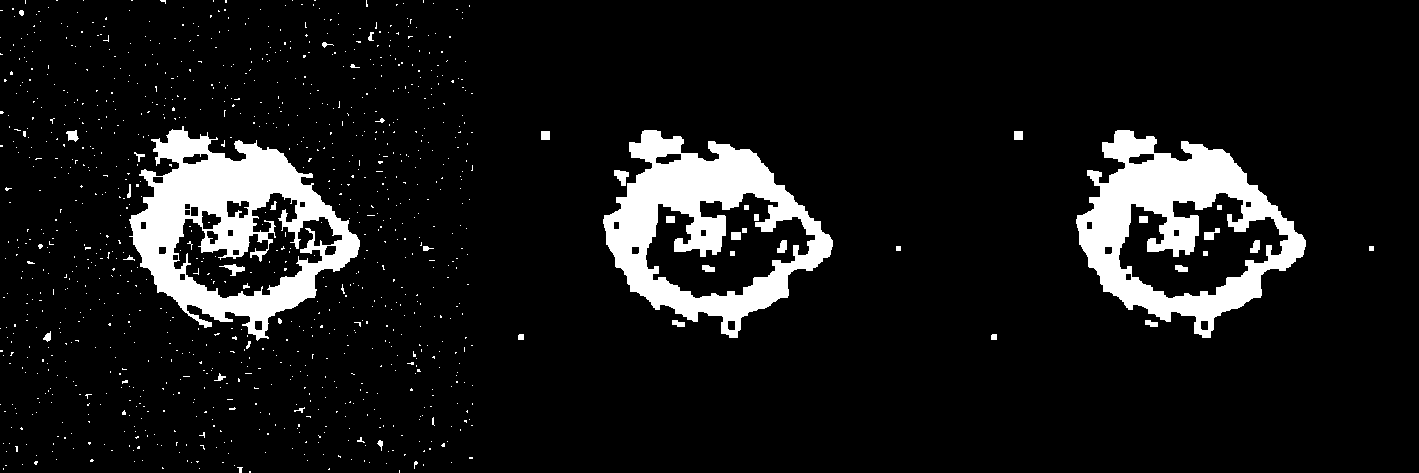


Porównanie obrazu wejściowego i wyniku otwarcia właściwego



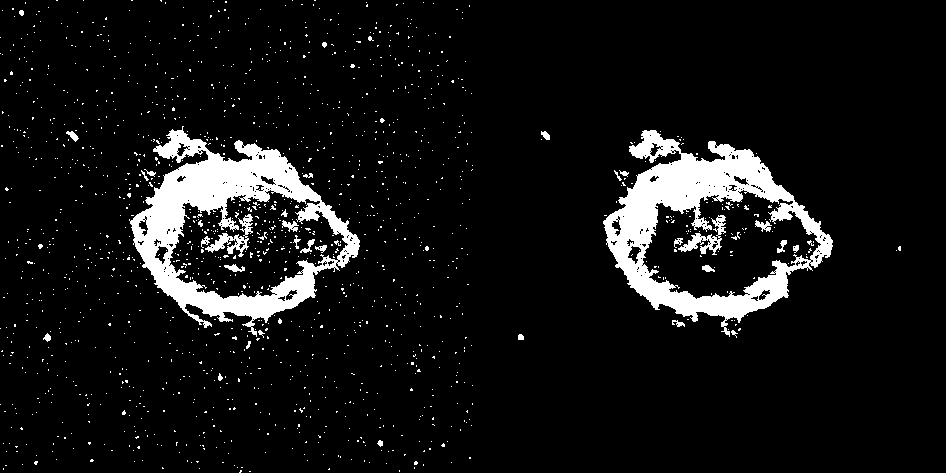

In [48]:
img_space_close = cv2.morphologyEx(img_space, cv2.MORPH_CLOSE, struct)
img_space_open = cv2.morphologyEx(img_space_close, cv2.MORPH_OPEN, struct)
img_space_close2 = cv2.morphologyEx(img_space_open, cv2.MORPH_CLOSE, struct)
img_space_Q = np.minimum(img_space, img_space_close2)

print('\nWyniki pośrednie\n')
imshow(np.concatenate([img_space_close, img_space_open, img_space_close2], 1))

print('\nPorównanie obrazu wejściowego i wyniku otwarcia właściwego\n')
imshow(np.concatenate([img_space, img_space_Q], 1))

Operacja zamknięcia właściwego składa się z następujących po sobie operacji otwarcia, zamknięcia i znowu otwarcia.

Wyniki można zinterpretować jako obraz wejściowy **z wyszczególnionym obszarem jednolitym**.


Wyniki pośrednie



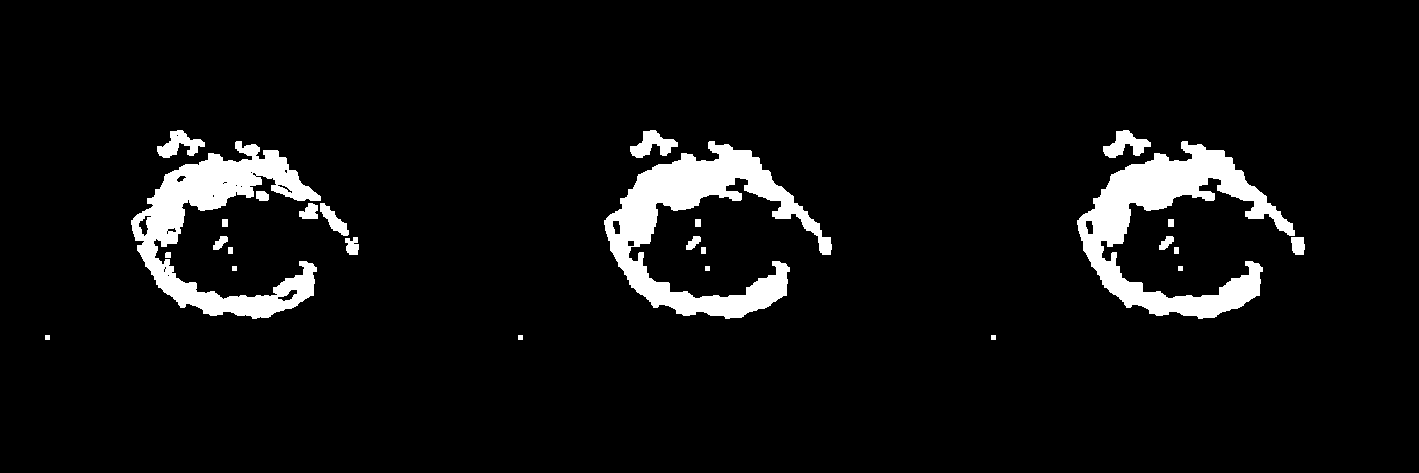


Porównanie obrazu wejściowego i wyniku zamknięcia właściwego



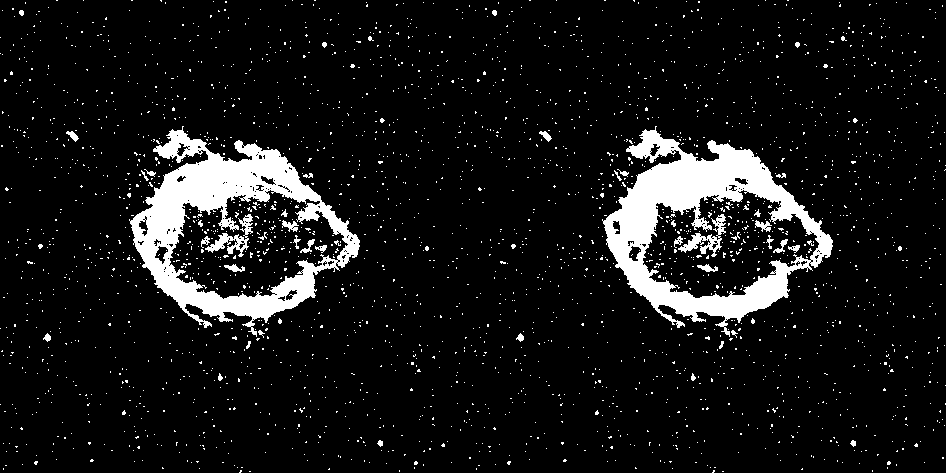

In [ ]:
img_space_open = cv2.morphologyEx(img_space, cv2.MORPH_OPEN, struct)
img_space_close = cv2.morphologyEx(img_space_open, cv2.MORPH_CLOSE, struct)
img_space_open2 = cv2.morphologyEx(img_space_close, cv2.MORPH_OPEN, struct)
img_space_G = np.maximum(img_space, img_space_open2)

print('\nWyniki pośrednie\n')
imshow(np.concatenate([img_space_open, img_space_close, img_space_open2], 1))

print('\nPorównanie obrazu wejściowego i wyniku zamknięcia właściwego\n')
imshow(np.concatenate([img_space, img_space_G], 1))

Dla lepszego porównania wyników poniżej zostały odseparowane obie funkcje $Q$ i $G$, a wyniki zostały skonfrontowane z obrazem wejściowym.

In [49]:
def Q(img_bin, struct):
  x = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_OPEN, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_CLOSE, struct)
  return np.minimum(img_bin, x)

def G(img_bin, struct):
  x = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_CLOSE, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_OPEN, struct)
  return np.maximum(img_bin, x)


Porównanie obrazu wejściowego i wyniku otwarcia właściwego



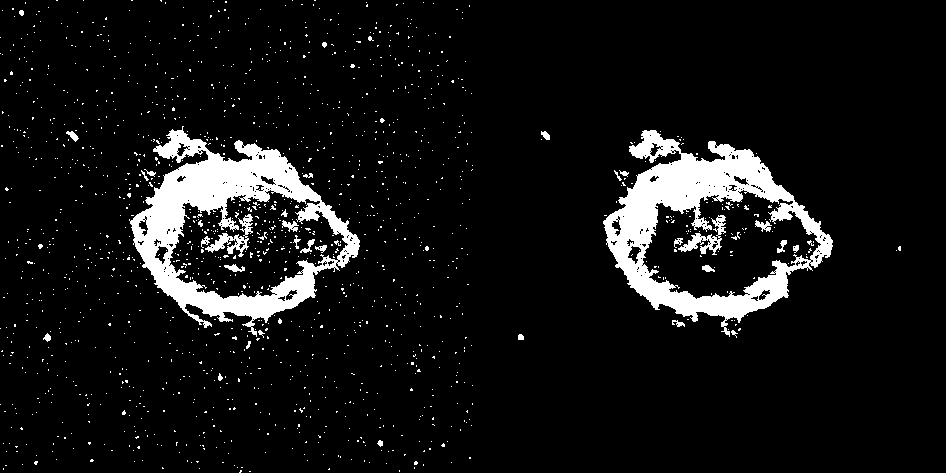


Porównanie obrazu wejściowego i wyniku zamknięcia właściwego



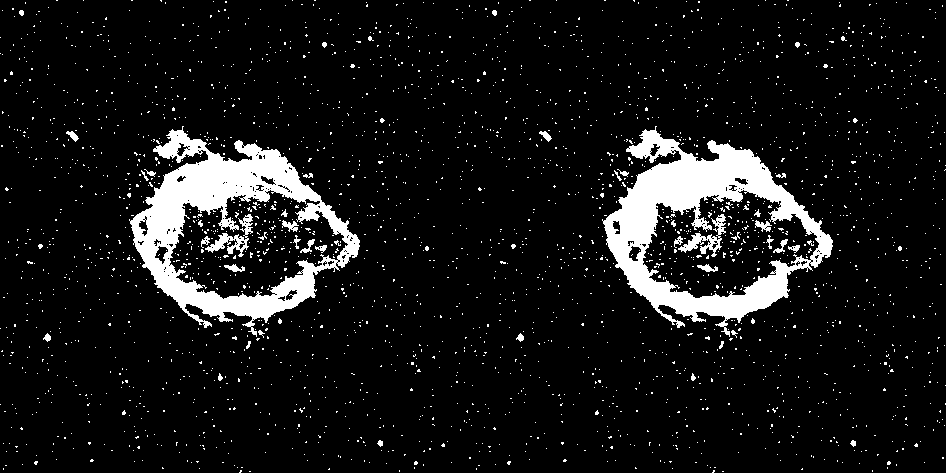

In [ ]:
print('\nPorównanie obrazu wejściowego i wyniku otwarcia właściwego\n')
imshow(np.concatenate([img_space, Q(img_space, struct)], 1))

print('\nPorównanie obrazu wejściowego i wyniku zamknięcia właściwego\n')
imshow(np.concatenate([img_space, G(img_space, struct)], 1))

#### Zadanie 3

Analogicznie do powyższych funkcji, zaimplementuj operację **automediany** i przetestuj ją na wcześniej przetwarzanym obrazie supernowy (w przestrzeni binarnej).

a) skorzystaj z funkcji dostępnych w OpenCV,
b) napisz, czym charakteryzuje się otrzymany obraz w porównaniu z otwarciem właściwym i zamknięciem właściwym.


Porównanie obrazu wejściowego i automediany



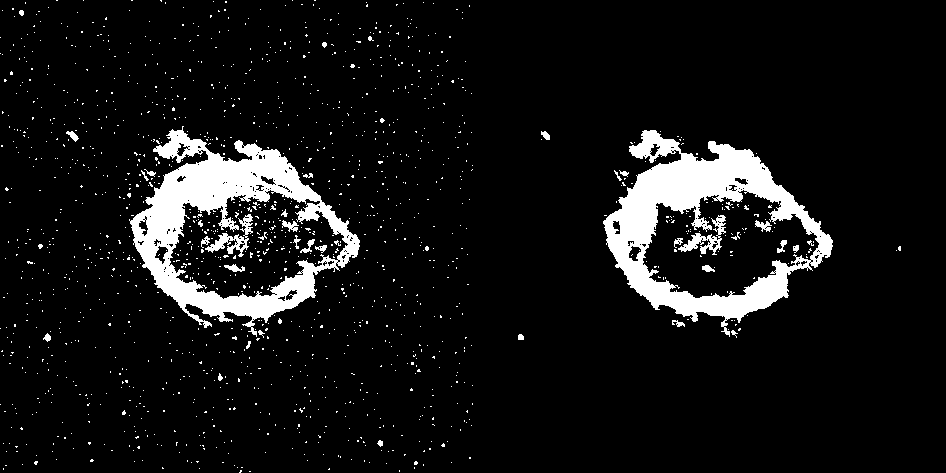

In [51]:
def A(img, struct):
  x = cv2.morphologyEx(img, cv2.MORPH_CLOSE, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_OPEN, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_CLOSE, struct)
  x1 = np.minimum(img, x)

  x = cv2.morphologyEx(img, cv2.MORPH_OPEN, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_CLOSE, struct)
  x = cv2.morphologyEx(x, cv2.MORPH_OPEN, struct)
  return np.maximum(x, x1)

print('\nPorównanie obrazu wejściowego i automediany\n')
imshow(np.concatenate([img_space, A(img_space, struct)], 1))

## Operacje morfologiczne jako zalążek rozpoznawania wzorców

Operacje morfologiczne są operacjami opartymi na operacjach logicznych. Implikuje to pewne praktyczne zastosowania w przetwarzaniu obrazów, a w szczególności rozpoznawania wzorców.

W ogólności, element strukturalny nie musi być prostym elementem, który sprawia, że wyniki erozji i dylatacji stają się większymi/mniejszymi obszarami. Element strukturalny może przyjąć bardziej złożoną formę i reprezentować pewne poszukiwane cechy na obrazie.

Zdefiniujmy bardziej wyrafinowany obraz binarny, zawierające pewne powtarzające się wzorce.

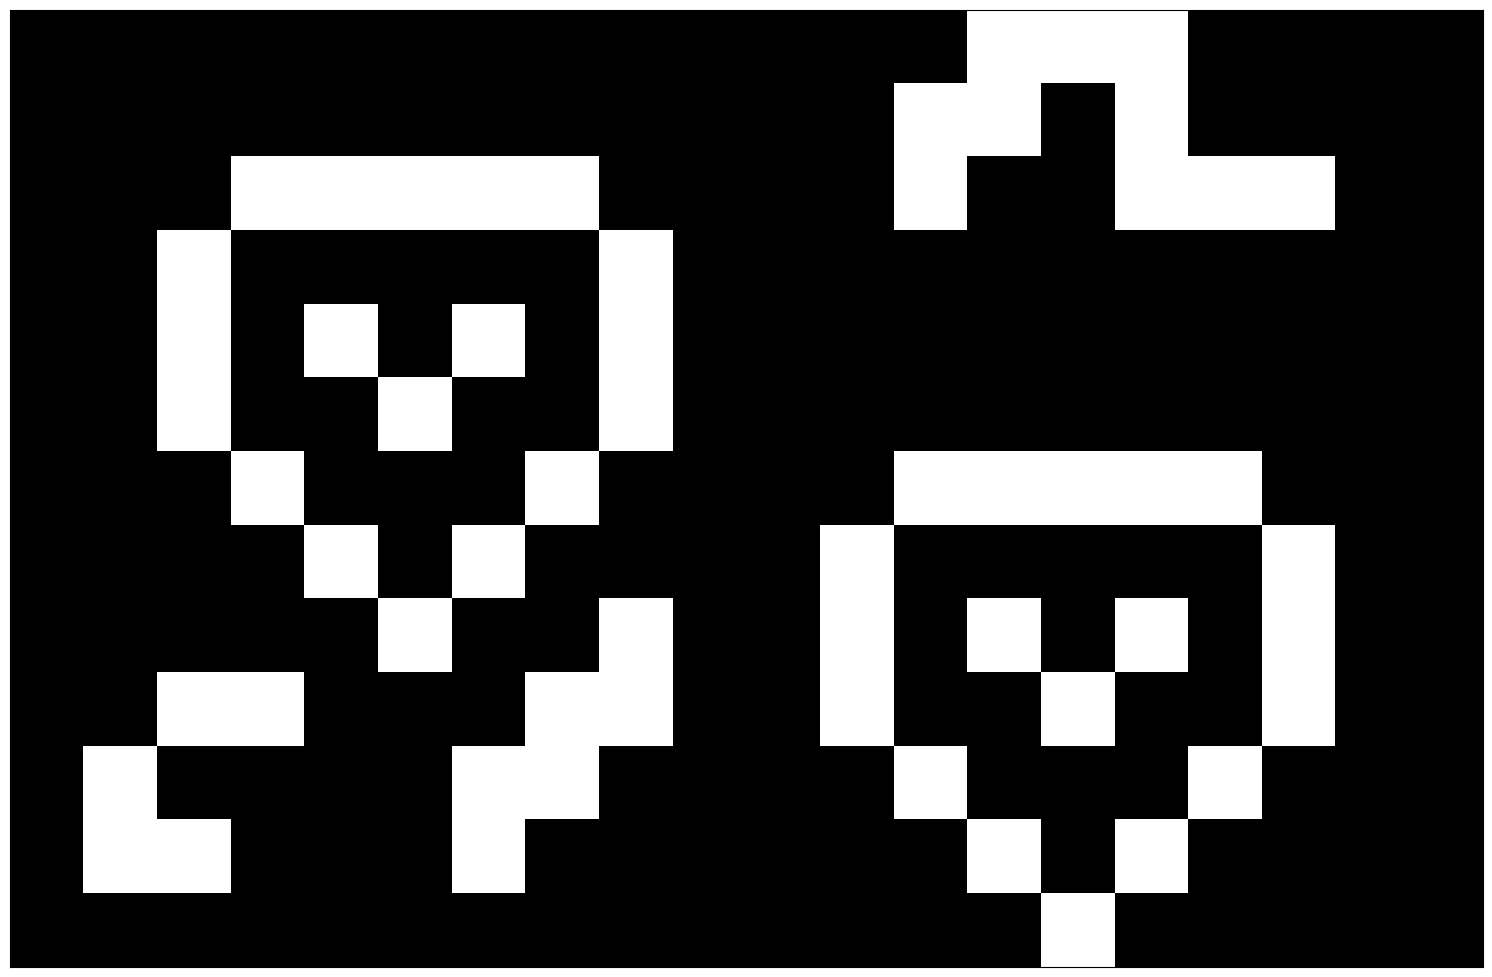

In [52]:
img_pattern = np.array([
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
  [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
  [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
  [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
], np.uint8)
h_color(img_pattern)

Jako element strukturalny zdefiniujmy sobie właśnie taki wzorzec.

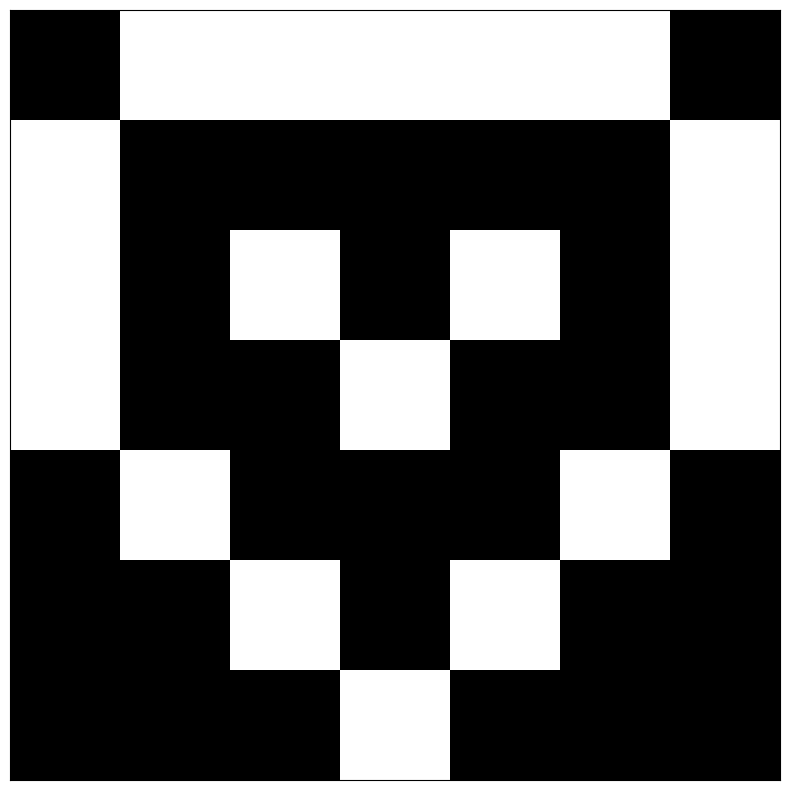

In [53]:
struct = np.array([
  [0, 1, 1, 1, 1, 1, 0],
  [1, 0, 0, 0, 0, 0, 1],
  [1, 0, 1, 0, 1, 0, 1],
  [1, 0, 0, 1, 0, 0, 1],
  [0, 1, 0, 0, 0, 1, 0],
  [0, 0, 1, 0, 1, 0, 0],
  [0, 0, 0, 1, 0, 0, 0]
], np.uint8)
h_color(struct)

**Spodziewanym rezultatem erozji obrazu wejściowego i obiektu strukturalnego będzie maska bitowa, z zapalonymi pikselami w pozycjach gdzie odnaleziony został obiekt strukturalny.**

(0) obiekt odnaleziony na pozycji (5, 5)
(1) obiekt odnaleziony na pozycji (9, 14)


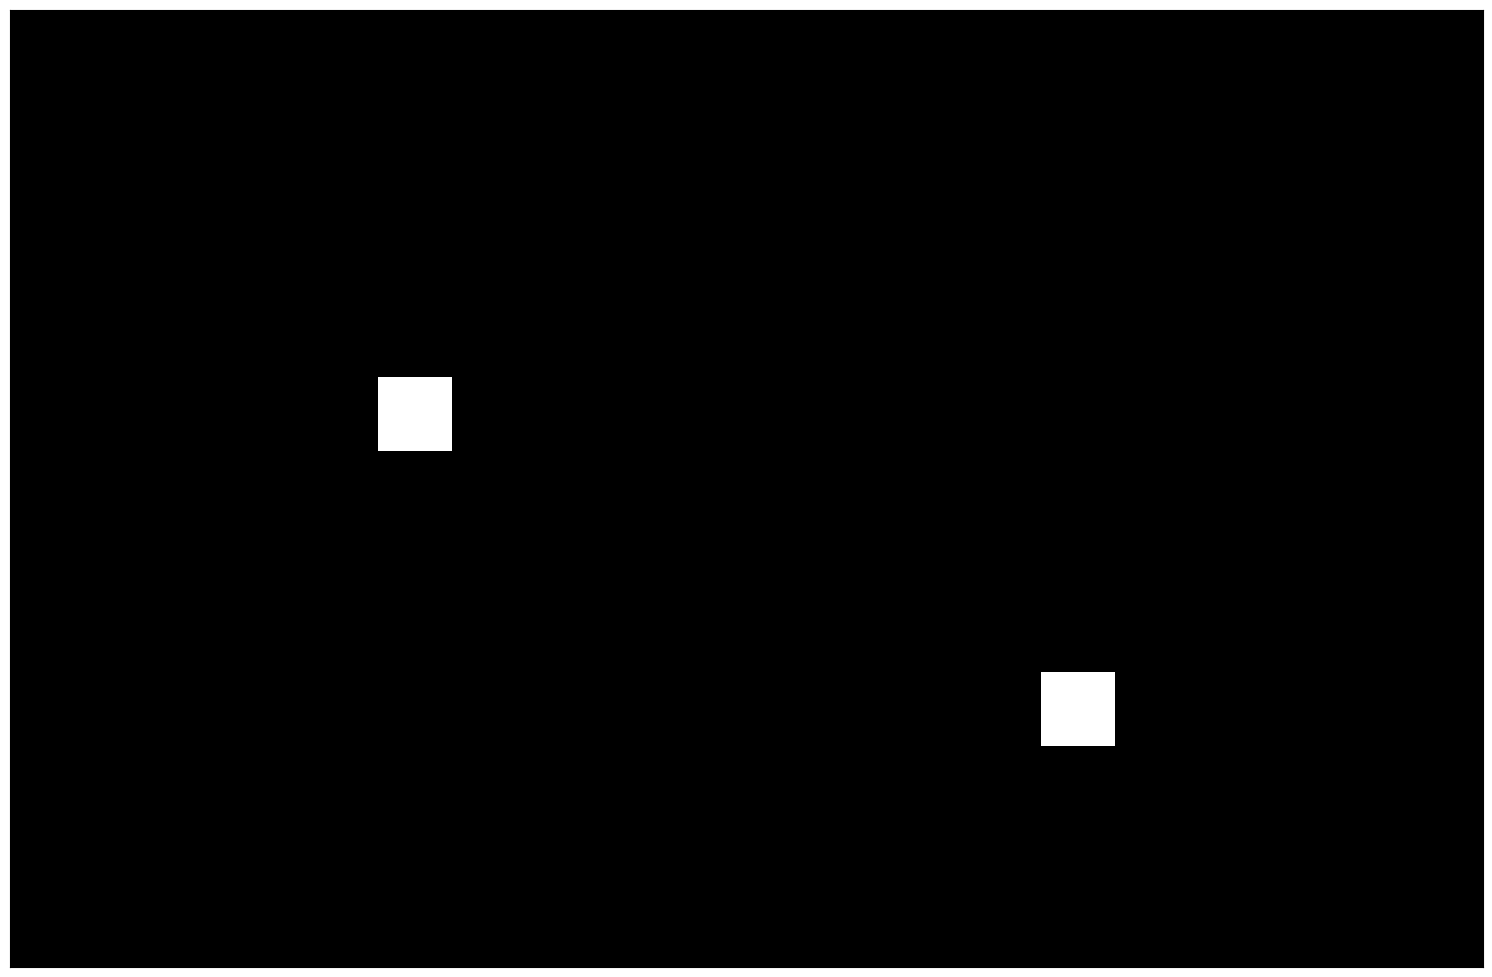

In [54]:
img_pattern_recognition = cv2.erode(img_pattern, struct, iterations = 1)

for i, xy in enumerate(zip(*np.where(img_pattern_recognition))):
  print(f'({i}) obiekt odnaleziony na pozycji {xy}')

h_color(img_pattern_recognition)

Co więcej, element strukturalny może pochodzić również z samego obrazu - można wyobrazić sobie sytuację w której znajdujemy otoczenia wszystkich pikseli i pobieramy najczęściej pojawiający się element. W ten sposób możemy stworzyć prosty **deskryptor** obrazu i wykorzystać go w przetwarzaniu **innych obrazów**.

## Morfologia ciągła w ujęciu funkcyjnym

Operacje erozji i dylatacji posiadają swoją interpretację w dziedzinie ciągłej. Przeanalizujmy przypadek erozji i dylatacji dla obrazu binarnego, wprowadzony wcześniej na potrzeby zadania 1 (s - element strukturalny, I - obraz wejściowy, d - macierz dopasowania):

$$s = \begin{bmatrix}
0 & 1 & 0\\
1 & -1 & 1\\
-1 & 0 & -1\\
\end{bmatrix}$$

$$I = \begin{bmatrix}
0 & 0 & 0\\
1 & 1 & 1\\
0 & 1 & 0\\
\end{bmatrix}$$

$$d = \begin{bmatrix}
1 & 0 & 1\\
1 & 0 & 1\\
1 & 1 & 1\\
\end{bmatrix}$$

Zdefiniowaliśmy sytuację, w której dylatacja zwróci wartość 1, jako sytuacja w której dowolny element macierzy dopasowania jest równy 1. Aby zaimplementować taką operację można wykonać: $max(d)$, a więc jeśli największa wartość (gdzie dla wartości binarnych wyrażenie $0 < 1$ jest prawdziwe). Widzimy, że operacja $max(d)$ zwróci wartość 1, gdy **dowolny element macierzy d będzie równy 1**.

Analogicznie, erozja zwróci wartość 1, gdy wszystkie elementy macierzy d będą równe 1. Innymi słowy, erozja wykonuje operację $min(d)$.

Dla tak zdefiniowanych operacji możemy wprowadzić erozje i dylatacje w ujęciu funkcyjnym dla dziedziny ciągłej jako:

$$(I \oplus s)(x, y) = \max\{I(x - \Delta x, y - \Delta y) + s(x, y) : (x - \Delta x, y - \Delta y) \in D_I, (x, y) \in D_s\}$$

$$(I \ominus s)(x, y) = \min\{I(x - \Delta x, y - \Delta y) - s(x, y) : (x - \Delta x, y - \Delta y) \in D_I, (x, y) \in D_s\}$$

gdzie:
* $\oplus$ - dylatacja,
* $\ominus$ - erozja,
* $D_I$ - dziedzina obrazu (tj. wszystkie piksele, jeśli piksel nie należy do $D_I$ oznacza to, że wychodzi poza obszar obrazu),
* $D_s$ - dziedzina elementu strukturalnego,
* $\Delta x \Delta y$ - przesunięcia które realizują operację przyłożenia elementu strukturalnego do obrazu,

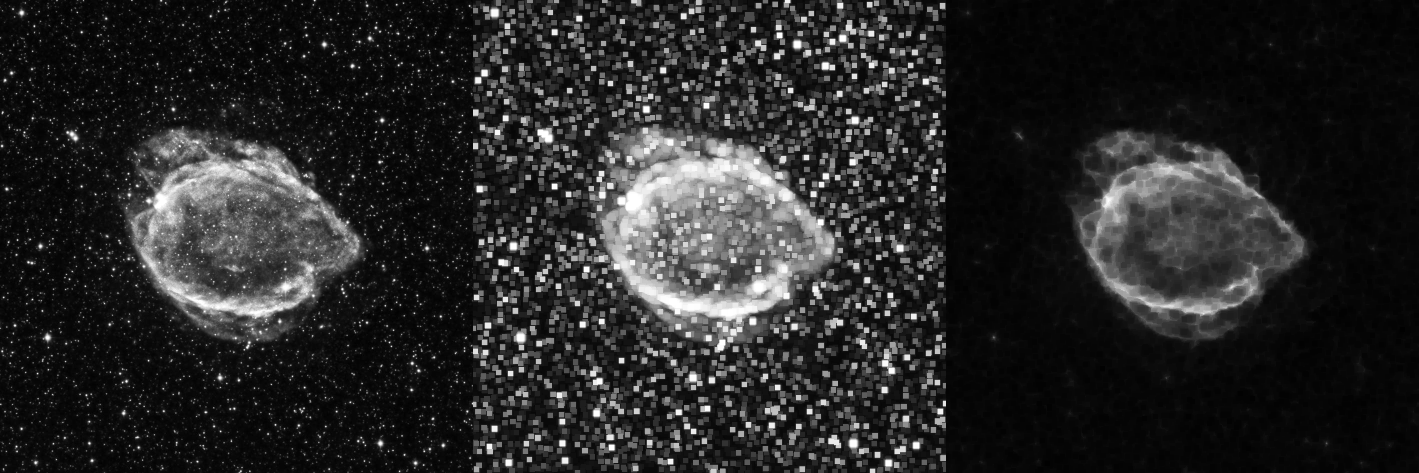

In [55]:
img_space_raw = cv2.imread('./supernova.jpg', 0)
img_space_raw = cv2.resize(img_space_raw, None, fx=0.5, fy=0.5)

struct = np.ones([5, 5], np.uint8)

img_space_dil = cv2.dilate(img_space_raw, struct, iterations=1)
img_space_ero = cv2.erode(img_space_raw, struct, iterations=1)

imshow(np.concatenate([img_space_raw, img_space_dil, img_space_ero], 1))

### Zadanie 4

Sprawdź, czy implementacja erozji i dylatacji, z zadania 1, działa dla obrazów z dziedziny grayscale. Jeśli nie, zaimplementuj wersję, która obsłuży dane wejściowe w formacie grayscale.

**Uwaga 1: implementacja nie musi obsługiwać wariantu, gdy składową elementu strukturalnego jest wartość -1. Dla uproszczenia można założyć, że element strukturalny zawiera dane jedynie dodatne.**

In [57]:
img_space_raw = cv2.imread('./supernova.jpg', 0)
img_space_raw = cv2.resize(img_space_raw, None, fx=0.5, fy=0.5)

struct_bin = np.ones([5, 5], np.uint8)
struct_float = np.array([
  [0.1, 0.5, 0.1],
  [0.5, 0.8, 0.5],
  [0.1, 0.5, 0.1]
])

def dilate_f(img, struct):
    return dilate(img, struct)

def erode_f(img, struct):
    return erode(img, struct)

img_space_dil_bin = dilate_f(img_space_raw, struct_bin)
img_space_ero_bin = erode_f(img_space_raw, struct_bin)
img_space_dil_float = dilate_f(img_space_raw, struct_float)
img_space_ero_float = erode_f(img_space_raw, struct_float)

print('\nWynik operacji morfologicznych dla elementu strukturalnego binarnego\n')
imshow(np.concatenate([img_space_raw, img_space_dil_bin, img_space_ero_bin], 1))

print('\nWynik operacji morfologicznych dla elementu strukturalnego zmiennoprzecinkowego\n')
imshow(np.concatenate([img_space_raw, img_space_dil_float, img_space_ero_float], 1))

KeyboardInterrupt: 

## Zadanie Dodatkowe 5\*

Zaimplementuj algorytm wykrywania krawędzi dla obrazów binarnych oparty na operacji ścieniania (**thinning**).

[Link do wikipedii](https://pl.wikipedia.org/wiki/Cyfrowe_przetwarzanie_obraz%C3%B3w_binarnych)

**Uwaga: nie wykorzystuj OpenCV do wykonywania operacji morfoologicznych.**

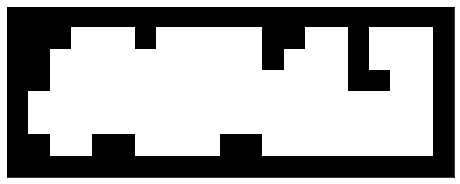

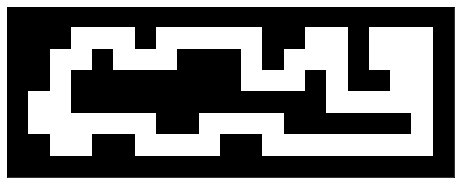

In [ ]:
img_bin = np.array([
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
  [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0],
  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
  [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
], np.uint8)

struct = np.ones([3, 3], np.uint8)

# TODO:
img_thin = ...
raise NotImplementedError()

h_color(img_bin, fx=1.0, fy=1.0)
h_color(img_thin, fx=1.0, fy=1.0)
